In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets


In [7]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
# Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]
# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25
# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]
# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

           bmi
422  27.335902
423  23.811456
424  25.331171
425  23.779122
426  23.973128
427  25.169499
428  27.659245
429  24.005462
430  23.294106
431  24.070131
432  26.656880
433  23.197103
434  25.040162
435  24.296472
436  22.776757
437  25.589846
438  24.522812
439  24.522812
440  26.171865
441  22.809091


,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


Text(0, 0.5, 'Diabetes Risk')

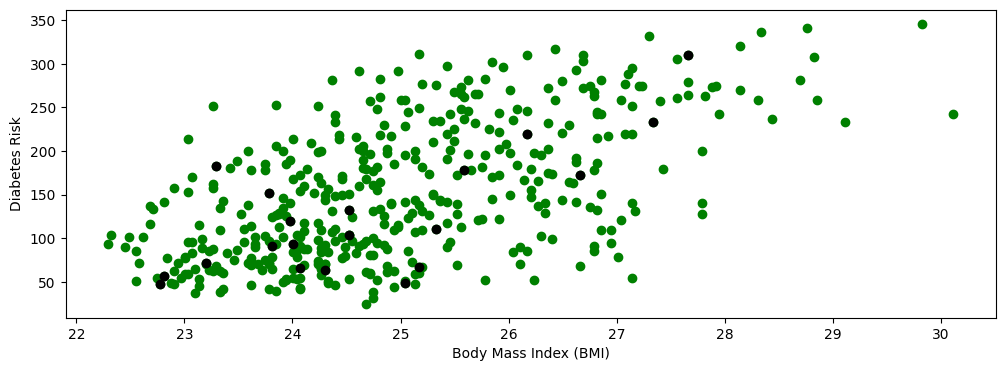

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
# plt.scatter(diabetes_X, diabetes_y, color='green')n 
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)
# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)
# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)



Slope (theta1): 	 37.378842160521195
Intercept (theta0): 	 -797.0817390343259


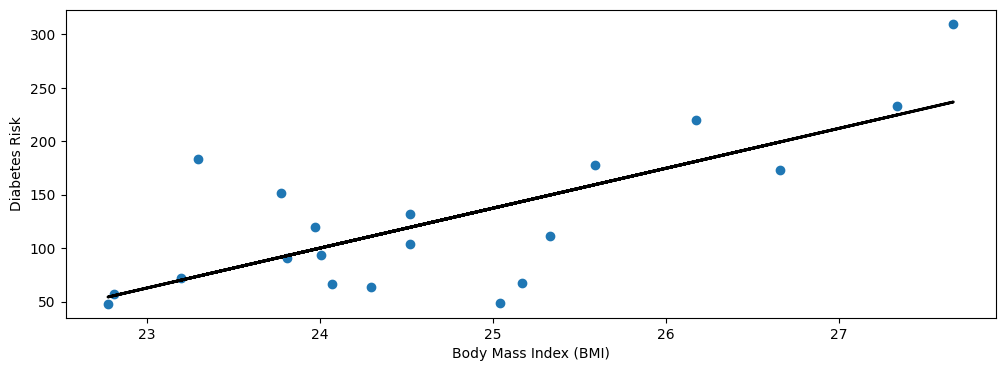

In [6]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)


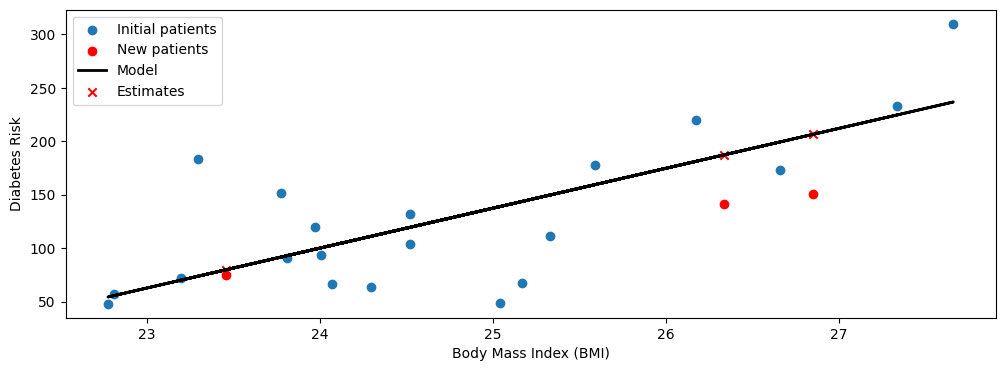

In [15]:
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

diabetes_y_test_pred = regr.predict(diabetes_X_test)
plt.scatter( diabetes_X_test,diabetes_y_test_pred, color='red', marker = 'x')
plt.legend(['Initial patients', 'New patients', 'Model', 'Estimates'])
